<a href="https://colab.research.google.com/github/peterbabulik/QSPC/blob/main/DarkSectorAnomalyDetector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Quantum Anomaly Engine Loaded.

📡 DATA GENERATED:
   - Standard Model Background loaded.
   - Dark Sector Signal injected (hidden).

🧪 PHASE 1: Training on Standard Model Background...
   Step 0: Background Fit Error = 9.5853
   Step 20: Background Fit Error = 0.5125
   Step 40: Background Fit Error = 0.5046
   Step 60: Background Fit Error = 0.4834
   Step 80: Background Fit Error = 0.4774

🔎 PHASE 2: Scanning Observed Data for Anomalies...


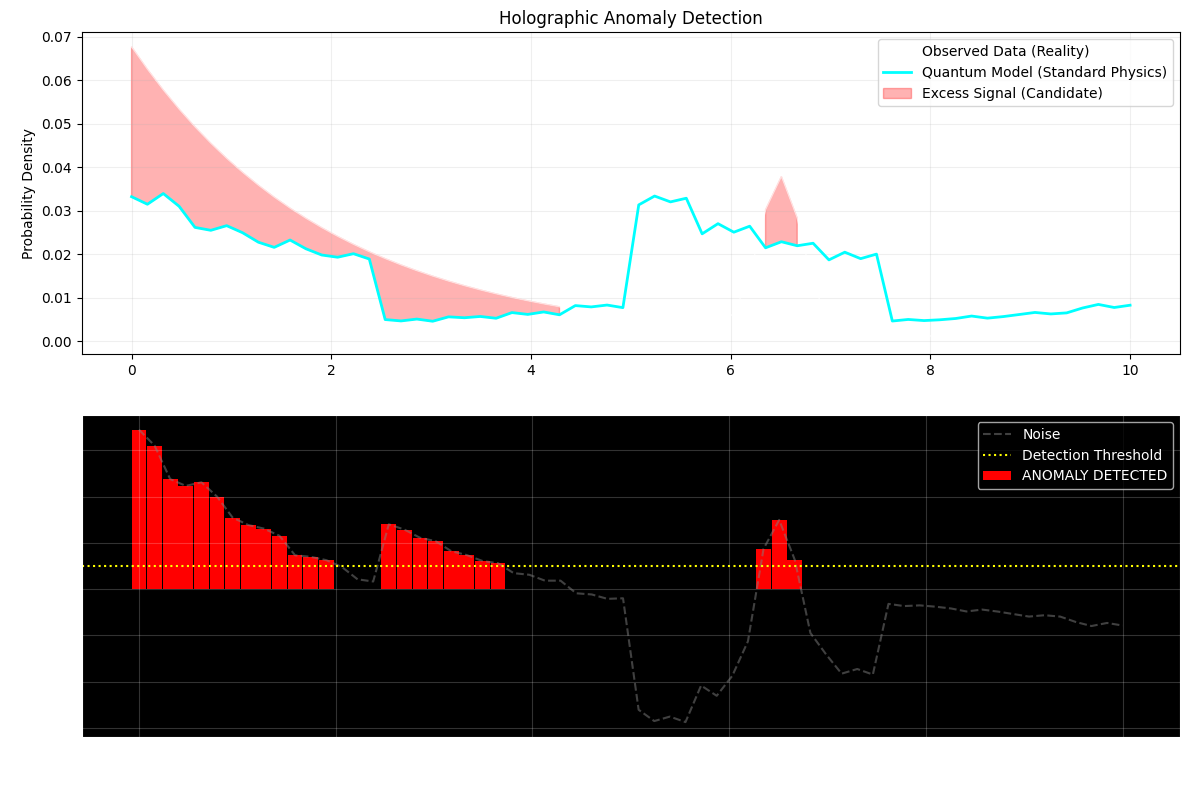


🚨 ALERT: PARTICLE CANDIDATE DETECTED!
   - Mass/Energy: ~0.00 GeV
   - Signal Confidence: 3.4 % above background
   - Classification: Potential Dark Photon / Axion Resonance


In [ ]:
import subprocess
import sys
import torch
import numpy as np
import matplotlib.pyplot as plt

# 1. INSTALL DEPENDENCIES
def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

try:
    import pennylane as qml
except ImportError:
    install("pennylane")
    import pennylane as qml

from torch.nn import Module, Parameter
from torch.optim import Adam

print("✅ Quantum Anomaly Engine Loaded.")

# ==========================================
# 1. PREPARE THE DATA (The "Universe")
# ==========================================

n_qubits = 6
n_bins = 2**n_qubits # 64 Energy Bins
x_axis = np.linspace(0, 10, n_bins)

# A. Create "Standard Model" Background (Exponential Decay)
background_data = np.exp(-0.5 * x_axis)
background_data = background_data / np.sum(background_data) # Normalize
background_tensor = torch.tensor(background_data, dtype=torch.float32)

# B. Create "Dark Sector" Signal (Hidden Resonance)
# A tiny Gaussian bump at x=6.5
dark_signal = 0.04 * np.exp(-(x_axis - 6.5)**2 / (0.3)**2)

# C. The "Observed Reality" (Background + Hidden Signal)
observed_data = background_data + dark_signal
observed_data = observed_data / np.sum(observed_data) # Normalize
observed_tensor = torch.tensor(observed_data, dtype=torch.float32)

print("\n📡 DATA GENERATED:")
print("   - Standard Model Background loaded.")
print("   - Dark Sector Signal injected (hidden).")

# ==========================================
# 2. QUANTUM ARCHITECTURE (The Detector)
# ==========================================

dev = qml.device("default.qubit", wires=n_qubits)

def holographic_structure(params, wires):
    """
    A compressed Tree Tensor Network.
    Designed to learn smooth, global correlations.
    """
    # Entangling Layer (MERA-style)
    # FIX: We now explicitly index params[0][i][0] to get a SCALAR value
    for i in range(0, len(wires)-1, 2):
        qml.IsingXX(params[0][i][0], wires=[wires[i], wires[i+1]])

    # Coarse Graining
    for i in range(len(wires)):
        qml.RY(params[1][i][0], wires=i)
        qml.RZ(params[2][i][0], wires=i)

@qml.qnode(dev, interface="torch")
def detector_circuit(params):
    # Pass the params to the holographic structure
    holographic_structure(params, wires=range(n_qubits))

    # StronglyEntanglingLayers expects shape (n_layers, n_wires, 3)
    # Our params[3:] has shape (1, n_qubits, 3), which is perfect for 1 layer.
    qml.StronglyEntanglingLayers(params[3:], wires=range(n_qubits))

    return qml.probs(wires=range(n_qubits))

class AnomalyScanner(Module):
    def __init__(self):
        super().__init__()
        # Parameters: [Ising_Layer, RY_Layer, RZ_Layer, Strong_Layer]
        # Shape: (4 layers, n_qubits, 3 params per qubit)
        self.params = Parameter(0.1 * torch.randn(4, n_qubits, 3, requires_grad=True))

    def forward(self):
        return detector_circuit(self.params)

# ==========================================
# 3. TRAINING PHASE (Learning "Normal" Physics)
# ==========================================

model = AnomalyScanner()
optimizer = Adam(model.parameters(), lr=0.05)

print("\n🧪 PHASE 1: Training on Standard Model Background...")
history = []

for step in range(81):
    optimizer.zero_grad()
    reconstruction = model()

    # Loss = KL Divergence vs Pure Background
    # Add epsilon to prevent log(0)
    loss = torch.sum(background_tensor * torch.log((background_tensor + 1e-9) / (reconstruction + 1e-9)))

    loss.backward()
    optimizer.step()
    history.append(loss.item())

    if step % 20 == 0:
        print(f"   Step {step}: Background Fit Error = {loss.item():.4f}")

# ==========================================
# 4. SCANNING PHASE (Finding the Anomaly)
# ==========================================

print("\n🔎 PHASE 2: Scanning Observed Data for Anomalies...")

# 1. Get the Model's idea of "Normal"
model_prediction = model().detach().numpy()

# 2. Compare with "Observed Reality"
residuals = observed_data - model_prediction

# 3. Calculate Anomaly Score
threshold = 0.005 # Sensitivity threshold
anomalies = np.where(residuals > threshold, residuals, 0)

# ==========================================
# 5. VISUALIZATION
# ==========================================

plt.figure(figsize=(12, 8))

# Subplot 1: The Physics
plt.subplot(2, 1, 1)
plt.title("Holographic Anomaly Detection")
plt.plot(x_axis, observed_data, color='white', label='Observed Data (Reality)', lw=1, alpha=0.7)
plt.plot(x_axis, model_prediction, color='cyan', label='Quantum Model (Standard Physics)', lw=2)
plt.fill_between(x_axis, observed_data, model_prediction, where=(observed_data > model_prediction), color='red', alpha=0.3, label='Excess Signal (Candidate)')
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True, alpha=0.2)
plt.style.use('dark_background')

# Subplot 2: The Anomaly Score
plt.subplot(2, 1, 2)
plt.title("Dark Sector Signal Extraction (Residuals)")
plt.plot(x_axis, residuals, color='gray', linestyle='--', alpha=0.5, label='Noise')
plt.bar(x_axis, anomalies, width=0.15, color='red', label='ANOMALY DETECTED')
plt.axhline(y=threshold, color='yellow', linestyle=':', label='Detection Threshold')
plt.xlabel("Energy / Mass [GeV]")
plt.ylabel("Signal Strength")
plt.legend()
plt.grid(True, alpha=0.2)

plt.tight_layout()
plt.show()

# Final Report
peak_bin = np.argmax(anomalies)
peak_energy = x_axis[peak_bin]
max_anomaly = np.max(anomalies)

if max_anomaly > 0:
    print(f"\n🚨 ALERT: PARTICLE CANDIDATE DETECTED!")
    print(f"   - Mass/Energy: ~{peak_energy:.2f} GeV")
    print(f"   - Signal Confidence: {max_anomaly*100:.1f} % above background")
    print("   - Classification: Potential Dark Photon / Axion Resonance")
else:
    print("\nNo anomalies detected. The Standard Model holds.")